In [1]:
## Importing relevant libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Stop warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading the dataset

df = pd.read_csv(r'data\articles_gender.csv')
print(df.shape)
df.head()

(142426, 8)


,title,content,author,publication,content_lemmatized,sentiment,compound_score,gender
0,house republicans fret winning health care sui...,washington congressional republicans new fear ...,Carl Hulse,New York Times,washington congressional republican new fear c...,positive,0.6497,male
1,rift officers residents killings persist south...,bullet shells get counted blood dries votive c...,Benjamin Mueller and Al Baker,New York Times,bullet shell get counted blood dry votive cand...,negative,-0.9999,male
2,tyrus wong bambi artist thwarted racial bias d...,walt disney bambi opened critics praised spare...,Margalit Fox,New York Times,walt disney bambi opened critic praised spare ...,positive,0.9888,male
3,among deaths heavy toll pop music new york times,death may great equalizer necessarily evenhand...,William McDonald,New York Times,death may great equalizer necessarily evenhand...,negative,-0.8609,male
4,kim jong un says north korea preparing test lo...,seoul south korea north korea leader kim said ...,Choe Sang-Hun,New York Times,seoul south korea north korea leader kim said ...,positive,0.9789,male


In [3]:
## Arranging the dataset

df = df[['title', 'content', 'author', 'publication', 'sentiment', 'compound_score', 'gender']]
df.rename(columns={'compound_score': 'sentiment_score'}, inplace=True)
df.head()

,title,content,author,publication,sentiment,sentiment_score,gender
0,house republicans fret winning health care sui...,washington congressional republicans new fear ...,Carl Hulse,New York Times,positive,0.6497,male
1,rift officers residents killings persist south...,bullet shells get counted blood dries votive c...,Benjamin Mueller and Al Baker,New York Times,negative,-0.9999,male
2,tyrus wong bambi artist thwarted racial bias d...,walt disney bambi opened critics praised spare...,Margalit Fox,New York Times,positive,0.9888,male
3,among deaths heavy toll pop music new york times,death may great equalizer necessarily evenhand...,William McDonald,New York Times,negative,-0.8609,male
4,kim jong un says north korea preparing test lo...,seoul south korea north korea leader kim said ...,Choe Sang-Hun,New York Times,positive,0.9789,male


In [4]:
## Disregarding articles with neutral sentiment or gender

df = df[(df['sentiment'] != 'neutral') & (df['gender'] != 'neutral')]
print(df.shape)

(134410, 7)


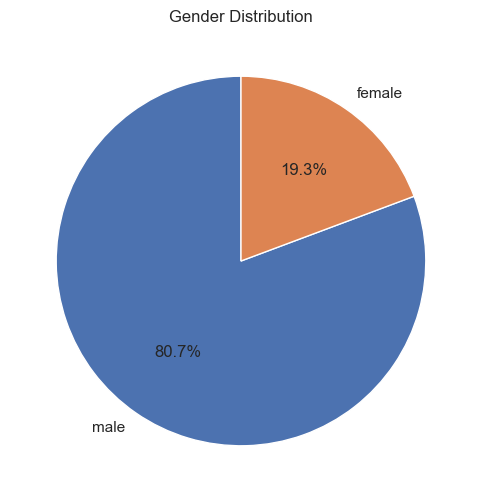

In [5]:
## Gender distribution

# Count the occurrences of each gender in the 'gender' column
gender_counts = df['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Gender Distribution')

# Show the pie chart
plt.show()

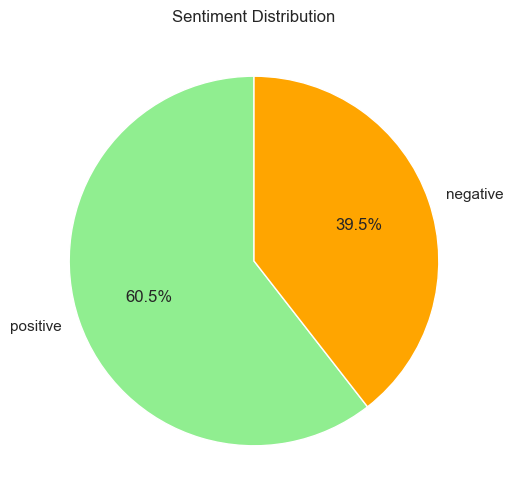

In [6]:
## Sentiment distribution

# Count the occurrences of each sentiment in the 'sentiment' column
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','orange'])

# Add a title
plt.title('Sentiment Distribution')

# Show the pie chart
plt.show()

In [7]:
## Filtering rows

positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']
male_df = df[df['gender'] == 'male']
female_df = df[df['gender'] == 'female']

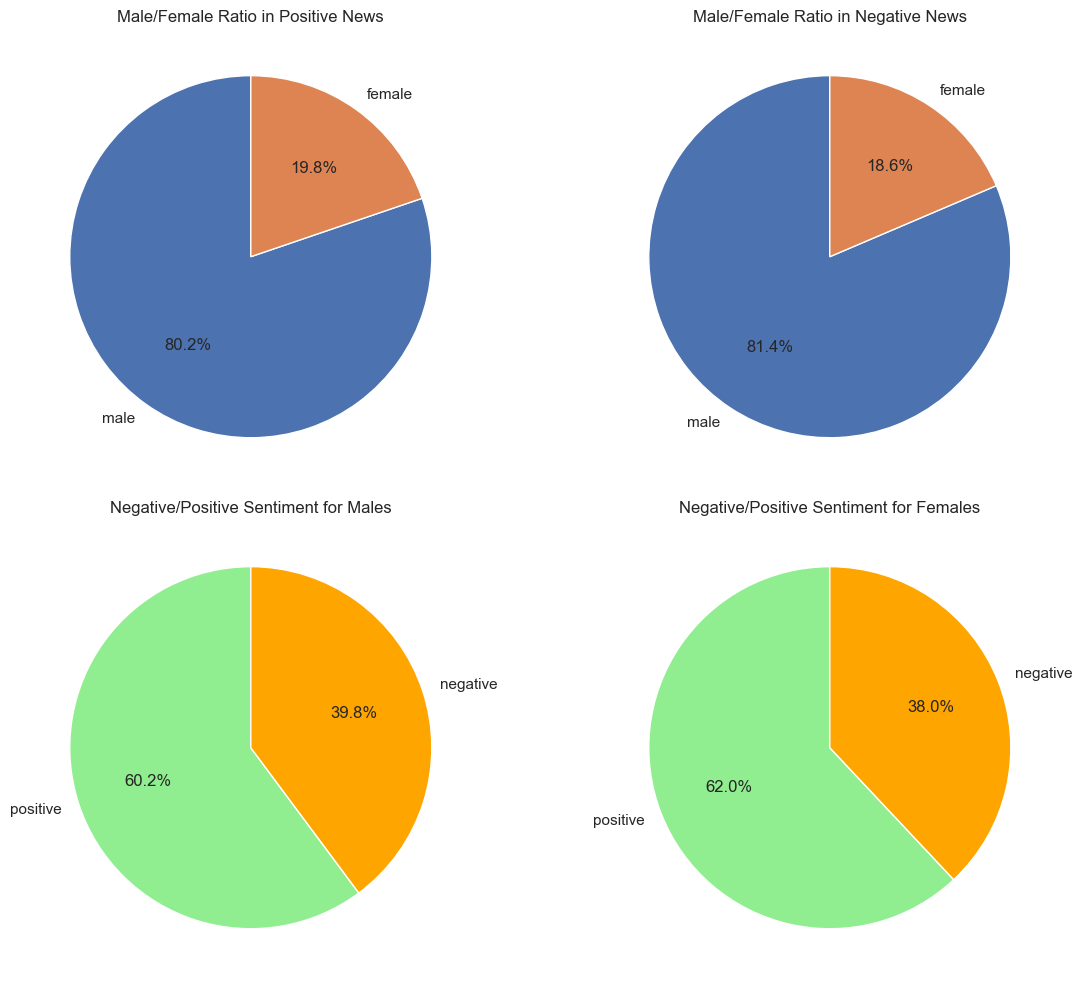

In [8]:
## Plots representing the male/female in negative/positive news and vice versa

# Calculating ratios
positive_gender_ratio = positive_df['gender'].value_counts(normalize=True)
negative_gender_ratio = negative_df['gender'].value_counts(normalize=True)
male_sentiment_ratio = male_df['sentiment'].value_counts(normalize=True)
female_sentiment_ratio = female_df['sentiment'].value_counts(normalize=True)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axes[0, 0].pie(positive_gender_ratio, labels=positive_gender_ratio.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Male/Female Ratio in Positive News')

axes[0, 1].pie(negative_gender_ratio, labels=negative_gender_ratio.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Male/Female Ratio in Negative News')

axes[1, 0].pie(male_sentiment_ratio, labels=male_sentiment_ratio.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','orange'])
axes[1, 0].set_title('Negative/Positive Sentiment for Males')

axes[1, 1].pie(female_sentiment_ratio, labels=female_sentiment_ratio.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','orange'])
axes[1, 1].set_title('Negative/Positive Sentiment for Females')

plt.tight_layout()
plt.show()

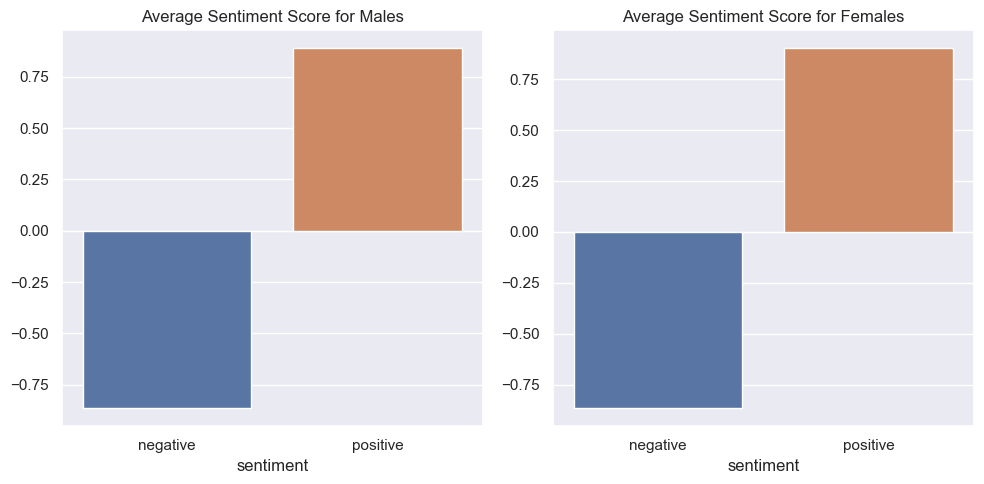

In [12]:
## Plotting average sentiment score for both genders

male_avg_sentiment = df[df['gender'] == 'male'].groupby('sentiment')['sentiment_score'].mean()
female_avg_sentiment = df[df['gender'] == 'female'].groupby('sentiment')['sentiment_score'].mean()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=male_avg_sentiment.index, y=male_avg_sentiment.values)
plt.title('Average Sentiment Score for Males')

plt.subplot(1, 2, 2)
sns.barplot(x=female_avg_sentiment.index, y=female_avg_sentiment.values)
plt.title('Average Sentiment Score for Females')

plt.tight_layout()
plt.show()

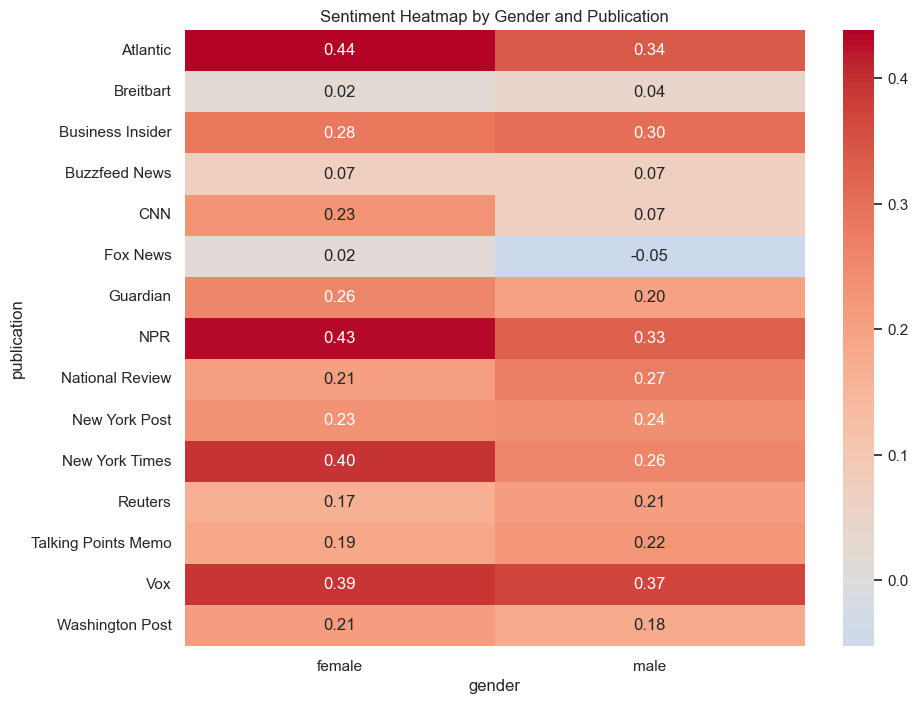

In [13]:
## Heatmap representing sentiment for both genders by each publication

heatmap_data = df.pivot_table(index='publication', columns='gender', values='sentiment_score', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title('Sentiment Heatmap by Gender and Publication')
plt.show()

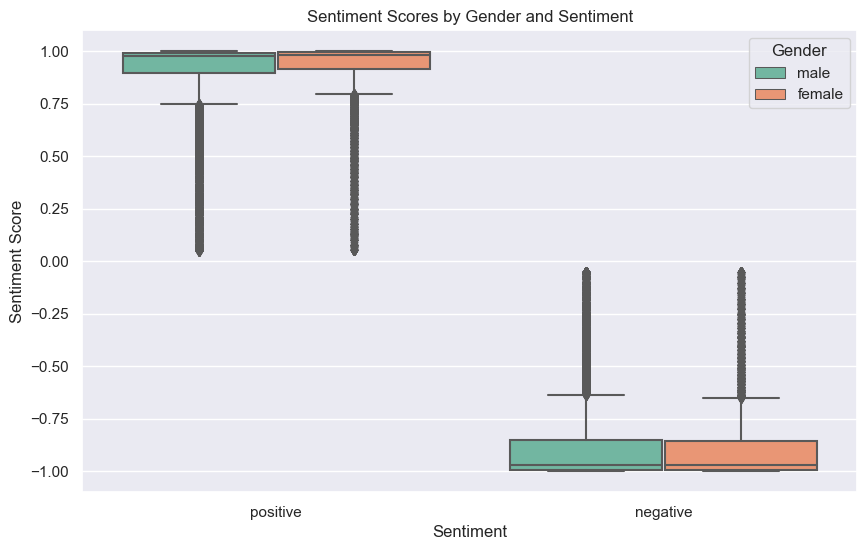

In [17]:
# Boxplots for each sentiment for each gender

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='sentiment_score', hue='gender', palette='Set2')
plt.title('Sentiment Scores by Gender and Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.legend(title='Gender', loc='upper right')
plt.show()

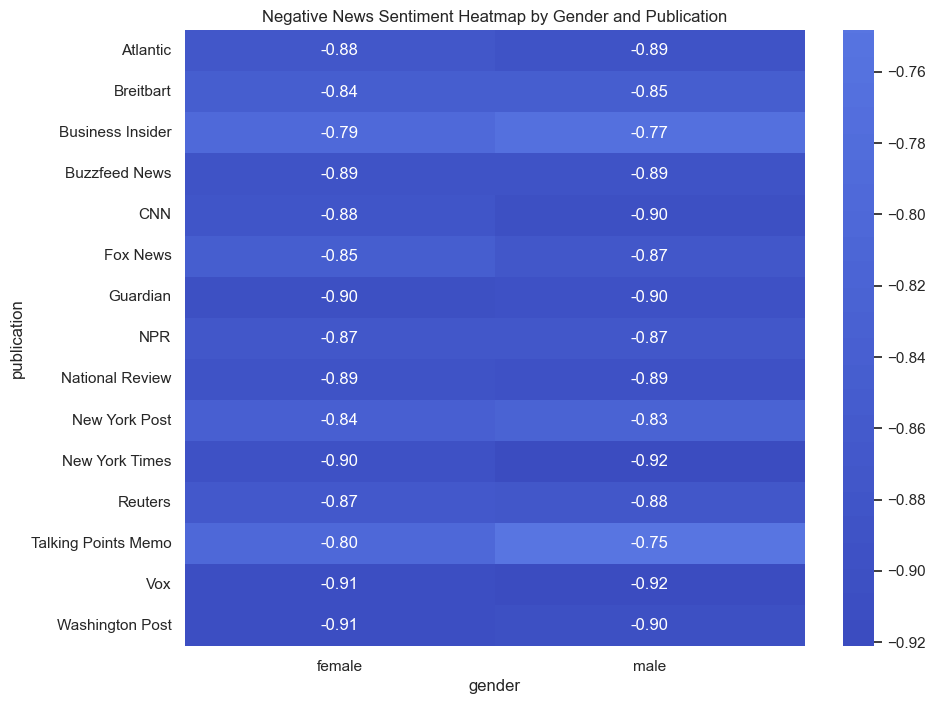

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Filter rows where sentiment is negative
negative_df = df[df['sentiment'] == 'negative']

# Pivot the data to create a heatmap
heatmap_data_negative = negative_df.pivot_table(index='publication', columns='gender', values='sentiment_score', aggfunc='mean')

# Create the heatmap for negative news
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_negative, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title('Negative News Sentiment Heatmap by Gender and Publication')
plt.show()


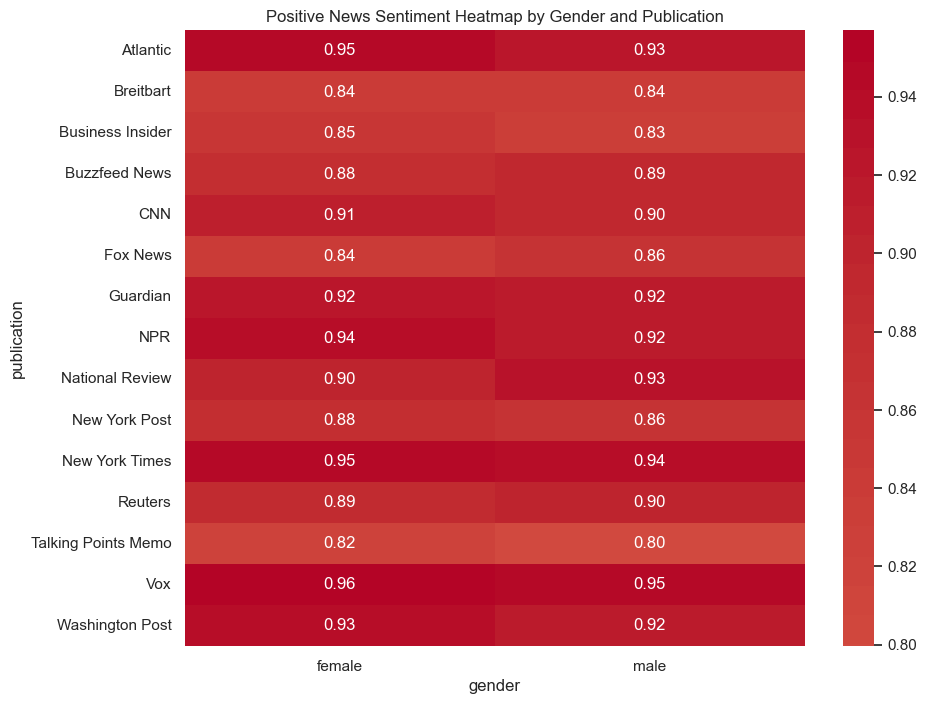

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Filter rows where sentiment is positive
positive_df = df[df['sentiment'] == 'positive']

# Pivot the data to create a heatmap
heatmap_data_positive = positive_df.pivot_table(index='publication', columns='gender', values='sentiment_score', aggfunc='mean')

# Create the heatmap for positive news
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_positive, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title('Positive News Sentiment Heatmap by Gender and Publication')
plt.show()
